#ANALYSE DE L’IMPACT DU COVID SUR L'ÉCONOMIE MONDIALE PAR L'INTERMÉDIAIRE DE L’INTELLIGENCE ARTIFICIELLE 

*Ce notebook développé par Rayan TAKKA traite un jeu de données fourni par Mendeley Data*

In [1]:
pip install -U scikit-learn

In [2]:
import numpy as np # Utilisé pour les opération algébriques sur le dataset
import pandas as pd # Utilisé pour le data processing

In [3]:
from google.colab import files # La librairie Google.colab est utilisée pour importer le dataset
uploaded = files.upload()

Saving raw_data.csv to raw_data.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['raw_data.csv'])) # On stocke le dataset dans panda dataframe

In [5]:
df #On visualise les attributs et les samples de notre dataset (5 premiers et 5 derniers)

iso_code     location        date  ...  Unnamed: 11  Unnamed: 12  Unnamed: 13
0          AFG  Afghanistan  2019-12-31  ...        #NUM!    17.477233  7.497754494
1          AFG  Afghanistan  2020-01-01  ...        #NUM!    17.477233  7.497754494
2          AFG  Afghanistan  2020-01-02  ...        #NUM!    17.477233  7.497754494
3          AFG  Afghanistan  2020-01-03  ...        #NUM!    17.477233  7.497754494
4          AFG  Afghanistan  2020-01-04  ...        #NUM!    17.477233  7.497754494
...        ...          ...         ...  ...          ...          ...          ...
50413      ZWE     Zimbabwe  2020-10-15  ...   4.34185547    16.514381  7.549490737
50414      ZWE     Zimbabwe  2020-10-16  ...   4.34185547    16.514381  7.549490737
50415      ZWE     Zimbabwe  2020-10-17  ...   4.34185547    16.514381  7.549490737
50416      ZWE     Zimbabwe  2020-10-18  ...   4.34185547    16.514381  7.549490737
50417      ZWE     Zimbabwe  2020-10-19  ...   4.34185547    16.514381  7.549490737

[50418 rows x 14 columns]

In [ ]:
df = df.rename(columns = {'human_development_index':'HDI','Unnamed: 9':'TC','Unnamed: 10':'TD','Unnamed: 11':'STI','Unnamed: 12':'POP','Unnamed: 13':'GDPCAP'}) 

# La première visualisation montre que certaines colonnes n'ont pas été nommés correctement (Unnamed 9, 10, 11, etc). J'utilise la fonction rename pour leur associer le nom des indicateurs correspondants. 

In [ ]:
df
# On vérifie que les modifications ont bien été effectués 

iso_code     location        date  ...         STI        POP       GDPCAP
0          AFG  Afghanistan  2019-12-31  ...       #NUM!  17.477233  7.497754494
1          AFG  Afghanistan  2020-01-01  ...       #NUM!  17.477233  7.497754494
2          AFG  Afghanistan  2020-01-02  ...       #NUM!  17.477233  7.497754494
3          AFG  Afghanistan  2020-01-03  ...       #NUM!  17.477233  7.497754494
4          AFG  Afghanistan  2020-01-04  ...       #NUM!  17.477233  7.497754494
...        ...          ...         ...  ...         ...        ...          ...
50413      ZWE     Zimbabwe  2020-10-15  ...  4.34185547  16.514381  7.549490737
50414      ZWE     Zimbabwe  2020-10-16  ...  4.34185547  16.514381  7.549490737
50415      ZWE     Zimbabwe  2020-10-17  ...  4.34185547  16.514381  7.549490737
50416      ZWE     Zimbabwe  2020-10-18  ...  4.34185547  16.514381  7.549490737
50417      ZWE     Zimbabwe  2020-10-19  ...  4.34185547  16.514381  7.549490737

[50418 rows x 14 columns]

In [ ]:
# On remarque que notre dataset contient certaines erreurs. Cela provient du fait que la valeur de certains indicateurs ( nombre de morts, nombre de décès, indice STI ) sont indispoinibles pour certains pays.
# La solution est donc d'utiliser la fonction to_numeric pour remplacer les erreurs par des valeurs numériques pour ensuite utiliser isnull.sum pour détérminer leur nombre. 

df['TC'] = pd.to_numeric(df['TC'],errors = 'coerce')
df['TD'] = pd.to_numeric(df['TD'],errors = 'coerce')
df['STI'] = pd.to_numeric(df['STI'],errors = 'coerce')
df['GDPCAP'] = pd.to_numeric(df['GDPCAP'],errors = 'coerce')

df

iso_code     location        date  ...       STI        POP    GDPCAP
0          AFG  Afghanistan  2019-12-31  ...       NaN  17.477233  7.497754
1          AFG  Afghanistan  2020-01-01  ...       NaN  17.477233  7.497754
2          AFG  Afghanistan  2020-01-02  ...       NaN  17.477233  7.497754
3          AFG  Afghanistan  2020-01-03  ...       NaN  17.477233  7.497754
4          AFG  Afghanistan  2020-01-04  ...       NaN  17.477233  7.497754
...        ...          ...         ...  ...       ...        ...       ...
50413      ZWE     Zimbabwe  2020-10-15  ...  4.341855  16.514381  7.549491
50414      ZWE     Zimbabwe  2020-10-16  ...  4.341855  16.514381  7.549491
50415      ZWE     Zimbabwe  2020-10-17  ...  4.341855  16.514381  7.549491
50416      ZWE     Zimbabwe  2020-10-18  ...  4.341855  16.514381  7.549491
50417      ZWE     Zimbabwe  2020-10-19  ...  4.341855  16.514381  7.549491

[50418 rows x 14 columns]

In [ ]:
df.isnull().sum()
# renvoie le nombre de valeurs manquantes dans l'ensemble de données afin de continuer le data cleaning 


iso_code                0
location                0
date                    0
total_cases          3094
total_deaths        11190
stringency_index     7126
population              0
gdp_per_capita       5712
HDI                  6202
TC                   3594
TD                  12298
STI                 10042
POP                     0
GDPCAP               5712
dtype: int64

In [ ]:
df['total_cases'] = df['total_cases'].replace(np.nan, float(0))
df['total_deaths'] = df['total_deaths'].replace(np.nan, float(0))
df['stringency_index'] = df['stringency_index'].replace(np.nan, float(0))
df['population'] = df['population'].replace(np.nan, float(0))
df['gdp_per_capita'] = df['gdp_per_capita'].replace(np.nan, float(0))
df['HDI'] = df['HDI'].replace(np.nan, float(0))

# Remplace toutes les valeurs nan obtenues par la méthode to_numeric par des valeurs nulles

In [ ]:
df['TC'] = df['TC'].combine_first(0 * df['total_cases'])
df['TD'] = df['TD'].combine_first(0 * df['total_deaths'])
df['STI'] = df['STI'].combine_first(0 * df['stringency_index'])
df['GDPCAP'] = df['GDPCAP'].combine_first(0 * df['gdp_per_capita'])
# Ensuite j'utilise combine_first pour combiner les séries correspondantes en une seule. Le résultat est l'union des deux séries.  
# En cas de valeur nulle dans la première série, la valeur de la série passée est prise. En cas de deux valeurs nulles au même indice, null est retourné à cet indice. 

df

iso_code     location        date  ...       STI        POP    GDPCAP
0          AFG  Afghanistan  2019-12-31  ...  0.000000  17.477233  7.497754
1          AFG  Afghanistan  2020-01-01  ...  0.000000  17.477233  7.497754
2          AFG  Afghanistan  2020-01-02  ...  0.000000  17.477233  7.497754
3          AFG  Afghanistan  2020-01-03  ...  0.000000  17.477233  7.497754
4          AFG  Afghanistan  2020-01-04  ...  0.000000  17.477233  7.497754
...        ...          ...         ...  ...       ...        ...       ...
50413      ZWE     Zimbabwe  2020-10-15  ...  4.341855  16.514381  7.549491
50414      ZWE     Zimbabwe  2020-10-16  ...  4.341855  16.514381  7.549491
50415      ZWE     Zimbabwe  2020-10-17  ...  4.341855  16.514381  7.549491
50416      ZWE     Zimbabwe  2020-10-18  ...  4.341855  16.514381  7.549491
50417      ZWE     Zimbabwe  2020-10-19  ...  4.341855  16.514381  7.549491

[50418 rows x 14 columns]

In [ ]:
df.isnull().sum()

# Vérification que notre dataset ne contient pas de valeurs manquantes

iso_code            0
location            0
date                0
total_cases         0
total_deaths        0
stringency_index    0
population          0
gdp_per_capita      0
HDI                 0
TC                  0
TD                  0
STI                 0
POP                 0
GDPCAP              0
dtype: int64

In [ ]:
df.describe()

total_cases   total_deaths  ...           POP        GDPCAP
count  5.041800e+04   50418.000000  ...  50418.000000  50418.000000
mean   6.215560e+04    2317.646555  ...     15.442097      8.318580
std    3.922702e+05   12267.528868  ...      2.495039      3.177130
min    0.000000e+00       0.000000  ...      6.695799      0.000000
25%    6.400000e+01       1.000000  ...     14.151619      7.955479
50%    1.203000e+03      24.000000  ...     15.929201      9.368531
75%    1.342225e+04     276.000000  ...     17.187513     10.237704
max    8.154595e+06  219674.000000  ...     21.087439     11.669379

[8 rows x 11 columns]

In [ ]:
# La phase de datacleaning est terminée : les colonnes redondantes ont été supprimés et les erreurs ont été remplacées par des valeurs numériques.
# Il est désormais passible de passer à la phase de Data Visualisation pour en apprendre plus sur notre dataset

# **Data Visualisation et statistiques descriptives**

Lors de cette phase mon objectif sera de : 

*   Explorer les relations entre les colonnes du dataset 
*   Intérpréter les relation qui découleraient des relations déterminées 

Tout commence par l'importation des modules qui seront nécéssaires

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 5
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Le graphique ci dessus montre la relation entre la date et le nombre total de cas. Il permet de remarquer que ce dernier augmente fortement dans chaque pays au début de l'épidémie, et qu'ensuite, le nombre de cas tend vers une valeur constante. Cela est une conséquence directe de la prise de conscience des gouvernements de l'enjeu sanitaire. 

In [ ]:
Graph = px.line(df, x="date", y="TC", color="location", 
              title='Évolution temporelle du nombre de cas',
              template="simple_white")

Graph.show()


Ensuite, ce graphique montre la relation entre la date et le nombre total de morts (déterminée à partir de la colonne total_deaths). On remarque qu'au début, le nombre de morts augmente fortement dans chaque pays, et qu'ensuite la nombre de morts est en très légère augmentation. 

In [ ]:
Graph2 = px.line(df, x="date", y="TD", color="location", 
              title='Évolution temporelle du nombre total de morts',
              template="simple_white")

Graph2.show()

Intérressons nous maintenant à  l'évolution temporelle de l'indice de rigueur pour chaque pays. Il illustre l'importance des mesures prises par chaque ayant pour but d'endiguer l'épidémie, ou du moins, limiter la propagation du virus. 

On remarque qu'à partir de Mars, des mesures très fortes ont été prises à l'échelle mondiale. Cela s'est traduit en France par exemple par un strict confinement national. Cependant, on voit également que les gouvernement ont commencé à relacher les restrictions à partir de Septembre 2020. À posteriori, cela peut être considéré comme une erreur puisque l'épidémie a connu un second pic à partir du mois de Novembre 2020. 

In [ ]:
fig2 = px.line(df, x="date", y="STI", color="location", 
              title='Évolution temporelle de l indice de rigueur',
              template="simple_white")

fig2.show()

En traçant par la suite l'évolution de l'IDH au cours de la pandémie, on remaque que sa valeur est restée constante. Cela s'explique par le fait que l'indice varie sur des intervalles de temps plus longs. 

In [ ]:
Graph3 = px.line(df, x="date", y="HDI", color="location", 
              title='Évolution temporelle de l IDH',
              template="simple_white")

Graph3.show()

Ce graphique montre la relation entre la date et la colonne GDPCAP. Le résultat obtenu est cohérent avec le graphe précédent car si le GDPCAP est élevé, l'IDH de ce pays le sera également.

In [ ]:
Graph4 = px.line(df, x="date", y="GDPCAP", color="location", 
              title='Évolution temporelle du GDPCAP',
              template="simple_white")

Graph4.show()

Passons désormais au tracé de la matrice de corrélation qui nous permettra de connaître la corrélation entre les différentes colonnes : 

<Figure size 720x360 with 0 Axes>

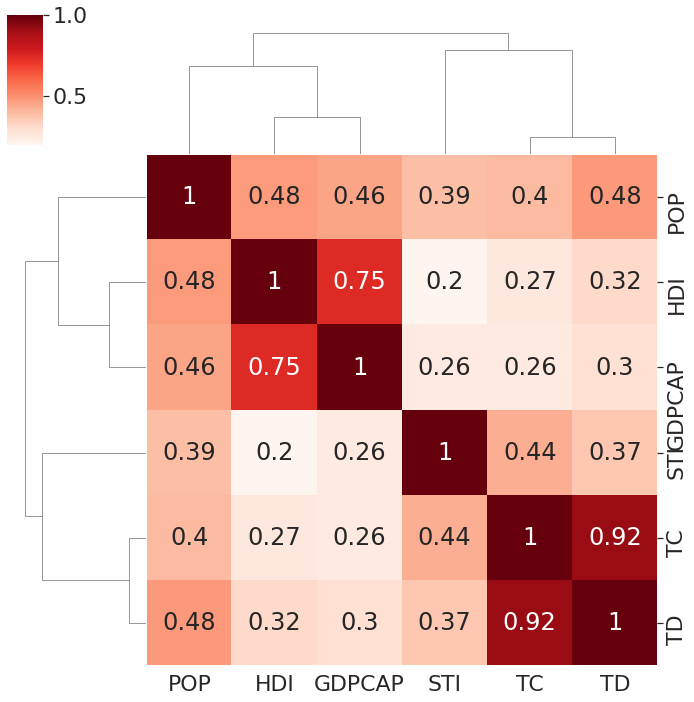

In [ ]:
plt.figure(figsize=(10,5))
corr_cols = ["TC", "TD", "STI", "POP", "HDI", "GDPCAP"]
sns.clustermap(df[corr_cols].corr(),annot = True,cmap = "Reds")
sns.set(font_scale=10)

In [ ]:
df['gdp_per_capita'].describe()

count     50418.000000
mean      18460.095227
std       20348.222700
min           0.000000
25%        2851.153000
50%       11713.895000
75%       27936.896000
max      116935.600000
Name: gdp_per_capita, dtype: float64

In [ ]:
covid_agg = df.groupby('location').agg(
            max_cases=("total_cases", "max"),
            max_deaths=("total_deaths", "max"),            
            gdp_per_capita = ("gdp_per_capita", 'first'),
            human_development_index = ("HDI", 'first'),
            population = ("POP", "first")
            ).reset_index()

{'United States': 'red', 'India': 'orange', 'Brazil': 'green', 'Russia': 'blue', 'Argentina': 'purple'}


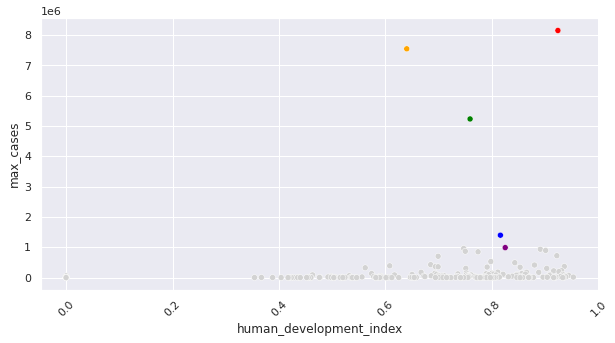

In [ ]:
total_cases_sorted = covid_agg.dropna(subset = ['human_development_index']).sort_values(['max_cases'], ascending = False)
colorlist = ['red','orange','green','blue','purple']
palette = {c:colorlist[i] for i, c in enumerate(total_cases_sorted['location'].unique()[:5])}
print(palette)
other_palette = {c:'lightgrey' for c in total_cases_sorted['location'].unique()[5:]}
palette = {**palette, **other_palette}

plt.figure(figsize = [10,5])
sns.set(style="darkgrid")

ax = sns.scatterplot(x='human_development_index', y='max_cases', hue='location', palette = palette, data = total_cases_sorted)
ax.get_legend().remove()
plt.xticks(rotation=45)
plt.show()

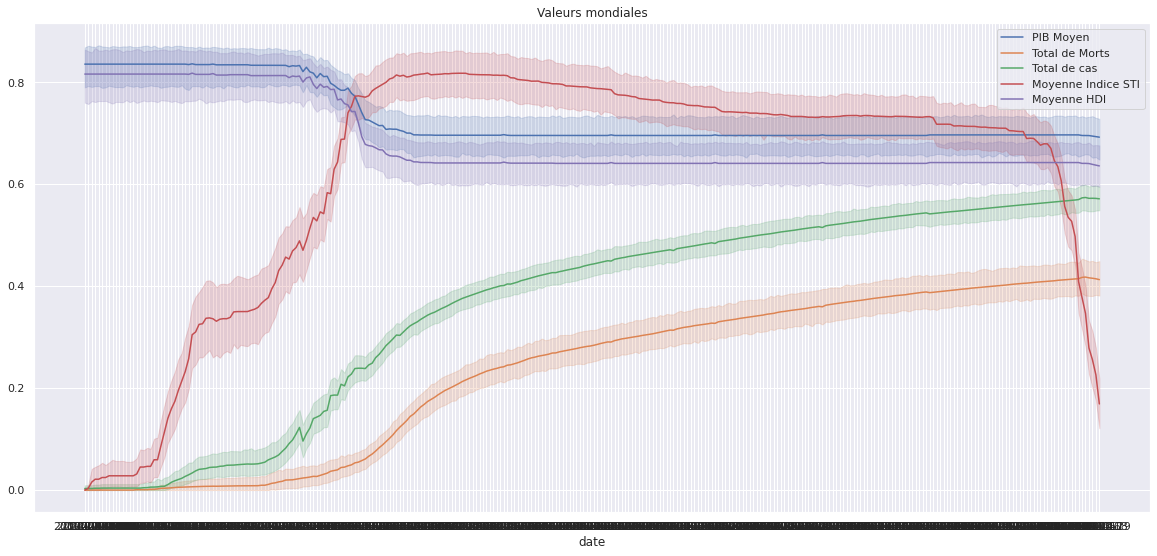

In [ ]:
from sklearn.preprocessing import MinMaxScaler
plt.subplots(figsize=(20,9))

sns.lineplot(x=df.date,y=MinMaxScaler().fit_transform(np.array(df['GDPCAP']).reshape(-1,1)).ravel(), label='PIB Moyen')
sns.lineplot(x=df.date,y=MinMaxScaler().fit_transform(np.array(df['TD']).reshape(-1,1)).ravel(), label='Total de Morts')
sns.lineplot(x=df.date,y=MinMaxScaler().fit_transform(np.array(df['TC']).reshape(-1,1)).ravel(), label='Total de cas')
sns.lineplot(x=df.date,y=MinMaxScaler().fit_transform(np.array(df['STI']).reshape(-1,1)).ravel(), label='Moyenne Indice STI')
sns.lineplot(x=df.date,y=MinMaxScaler().fit_transform(np.array(df['HDI']).reshape(-1,1)).ravel(), label='Moyenne HDI')
plt.title('Valeurs mondiales')
plt.show()

In [ ]:
covid_agg.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 210 non-null    object 
 1   max_cases                210 non-null    float64
 2   max_deaths               210 non-null    float64
 3   gdp_per_capita           210 non-null    float64
 4   human_development_index  210 non-null    float64
 5   population               210 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.5+ KB


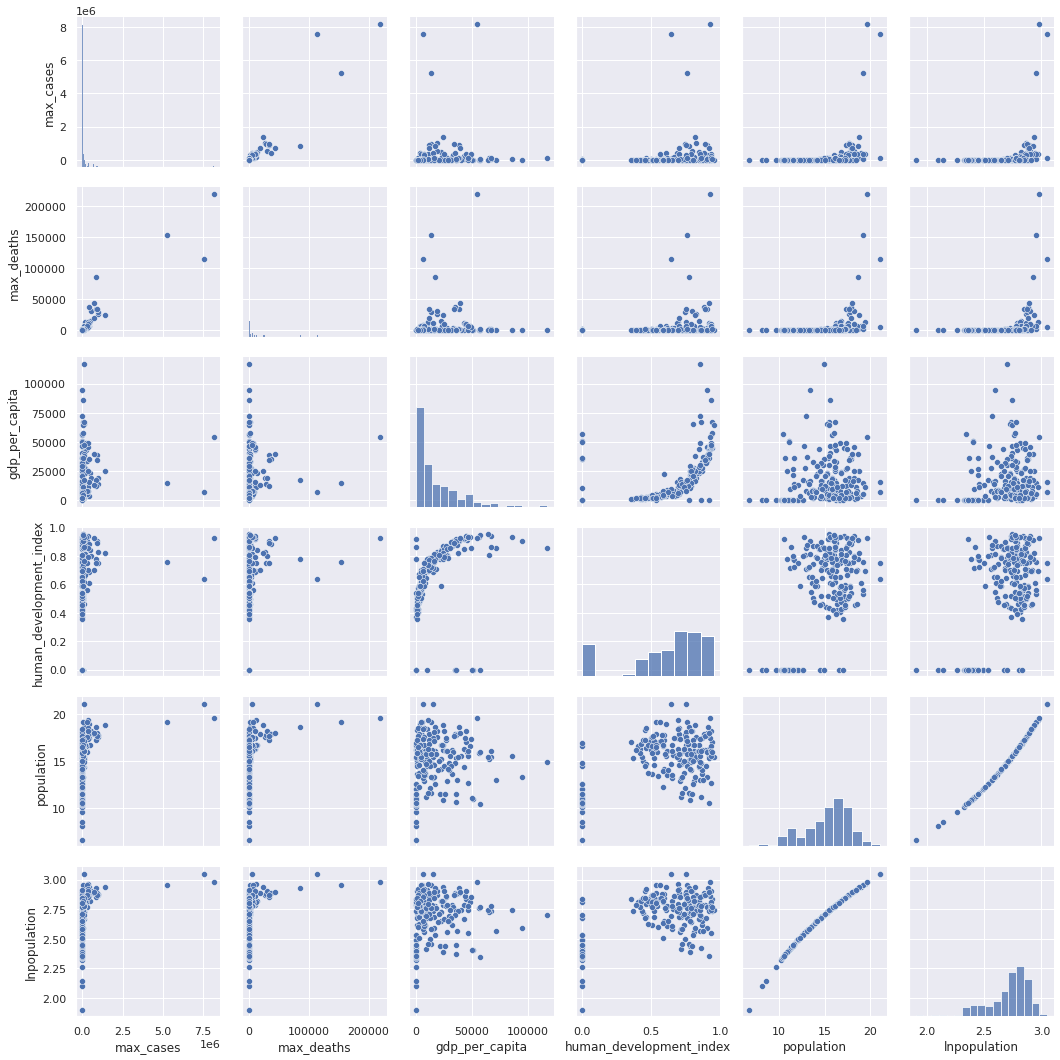

In [ ]:
covid_agg['lnpopulation'] = np.log(covid_agg['population'])
df = covid_agg.dropna()

sns.pairplot(df)

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


Y = df['max_cases']
X = df[['gdp_per_capita', 'human_development_index', 'lnpopulation']]

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                   feature       VIF
0           gdp_per_capita  2.289248
1  human_development_index  8.415065
2             lnpopulation  6.560671


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import statsmodels.api as sm

Y = df['max_cases']
X = df[['human_development_index', 'lnpopulation']]

result = sm.OLS( Y, X ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              max_cases   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              7.107
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                     0.00103
Time:                        22:23:38   Log-Likelihood:                         -3164.7
No. Observations:                 210   AIC:                                      6333.
Df Residuals:                     208   BIC:                                      6340.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
human_development_index  3.099e+05   2.22e+05      1.397      0.164   -1.27e+05    7.47e+05
lnpopulation             5024.9353   5.51e+04      0.091      0.927   -1.04e+05    1.14e+05
==============================================================================
Omnibus:                      335.494   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38865.866
Skew:                           7.881   Prob(JB):                         0.00
Kurtosis:                      67.756   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Y = df['max_deaths']
X = df[['human_development_index', 'lnpopulation']]

result = sm.OLS( Y, X ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             max_deaths   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.072
Method:                 Least Squares   F-statistic:                              9.113
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                    0.000161
Time:                        22:24:20   Log-Likelihood:                         -2391.4
No. Observations:                 210   AIC:                                      4787.
Df Residuals:                     208   BIC:                                      4793.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
human_development_index  1.018e+04   5581.315      1.824      0.070    -824.639    2.12e+04
lnpopulation             -222.7611   1386.409     -0.161      0.873   -2955.975    2510.453
==============================================================================
Omnibus:                      316.627   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30948.255
Skew:                           7.121   Prob(JB):                         0.00
Kurtosis:                      60.742   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""